In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Amazon_reviews_cleaned_finalform.csv')

In [ ]:
df.shape

(393441, 18)

###Creating 'Subjectivity' and 'Polarity' Scores

*   Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 
*   Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
from textblob import TextBlob

df['Text']= df['Text'].astype(str)
df['polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word,Good_reviews,polarity,subjectivity
0,150493,0006641040,AMX0PJKV4PPNJ,71,72,4,2004-09-29,read it once read it twice reading chicken sou...,days person says chicken soup theyre probably ...,200,122,0,2,10,295,1953,5.7,1,-0.030208,0.622783
1,150510,0006641040,AM1MNZMYMS7D8,0,0,5,2012-09-23,professional mentoring,title chicken soup ricebr author maurice senda...,26,77,0,0,11,57,433,6.7,1,0.042857,0.576190
2,150511,0006641040,A1C9K534BCI9GO,0,0,4,2012-08-06,charming and childlike,charming rhyming book describes circumstances ...,23,12,0,0,1,31,219,6.1,1,0.133333,0.825000
3,150512,0006641040,A1DJXZA5V5FFVA,0,0,5,2012-05-29,must have,set aside least hour day read son yo point con...,40,46,0,0,2,57,335,5.2,1,0.185714,0.219048
4,150513,0006641040,ASH0DZQQF6AIZ,0,0,5,2012-01-05,a classic,remembered book childhood got kids good rememb...,18,5,0,0,2,17,114,5.8,1,0.533333,0.626667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393436,193169,B009RSR8HO,A3M3S2NCVZ8UXF,0,0,5,2012-10-18,fat to skinny zero,using product months never go back sweetener t...,15,8,0,1,4,18,121,6.1,1,0.437500,0.637500
393437,188389,B009SF0TN6,A1L0GWGRK4BYPT,0,0,5,2012-10-18,amazing great sauce for everything,try sauce believe starts little sweet honey ta...,44,43,0,2,1,57,355,5.6,1,0.211250,0.626667
393438,221795,B009SR4OQ2,A32A6X5KCP7ARG,1,1,5,2012-10-19,awesome taste,bought hazelnut paste nocciola spread local sh...,7,5,0,0,1,14,100,6.2,1,0.500000,0.500000
393439,5703,B009WSNWC4,AMP7K1O84DH1T,0,0,5,2012-10-26,delicious,purchased product local store ny kids love qui...,17,7,0,1,1,20,117,5.2,1,0.316667,0.527778


In [ ]:
df['polarity'] = df['polarity'].round(2)
df['subjectivity'] = df['subjectivity'].round(2)

In [ ]:
data = pd.DataFrame()
for i in range (1,6):
  data.loc[i,'polarity']= (df.head(100000).loc[df.Score == i].polarity.mean())
  data.loc[i,'subjectivity']= (df.head(100000).loc[df.Score == i].subjectivity.mean())

In [ ]:
data

,polarity,subjectivity
1,0.015085,0.503352
2,0.094783,0.509773
3,0.153836,0.513557
4,0.241617,0.539068
5,0.299684,0.558880


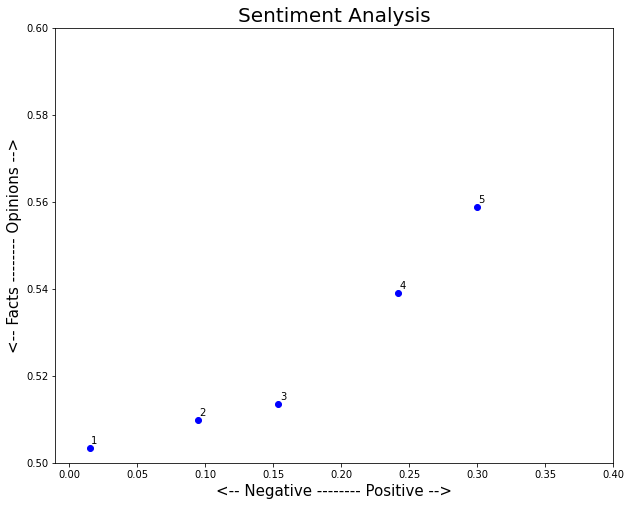

In [ ]:
# Let's plot the results
plt.rcParams['figure.figsize'] = [10, 8]

for index in range(1,6):
    x = data.polarity.loc[index]
    y = data.subjectivity.loc[index]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, index, fontsize=10)
    plt.xlim(-.01, .4) 
    plt.ylim(.5, .6) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

Let's create this plot for Good_Reviews

In [ ]:
data = pd.DataFrame()
for i in range (0,2):
  data.loc[i,'polarity']= (df.head(100000).loc[df.Good_reviews == i].polarity.mean())
  data.loc[i,'subjectivity']= (df.head(100000).loc[df.Good_reviews == i].subjectivity.mean())
  
data

,polarity,subjectivity
0,0.077482,0.508073
1,0.290496,0.555746


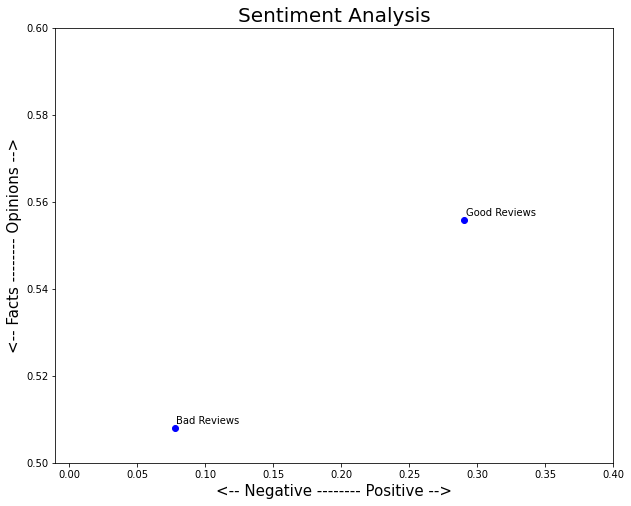

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]

for index, reviews in enumerate(data.index):
    review = 'Good Reviews' if reviews==1 else 'Bad Reviews'
    x = data.polarity.loc[reviews]
    y = data.subjectivity.loc[reviews]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, review, fontsize=10)
    plt.xlim(-.01, .4) 
    plt.ylim(.5, .6) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

### Distribution of the Good Reviews

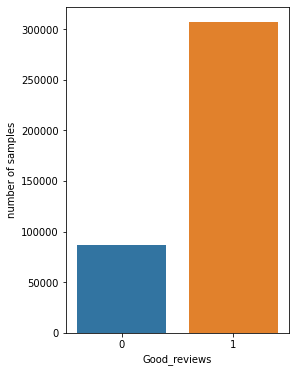

In [ ]:
a = df.groupby(['Good_reviews'])['Id'].count()
a = a.reset_index()
a = a.rename(columns={'Id': 'number of samples'})
fig, ax = plt.subplots(figsize=(4, 6))

sns.barplot(x='Good_reviews', y='number of samples', data=a)

So, the classes are unbalanced. Good reviews are dominant over bad reviews. We need to keep this in my during the analysis.

In [ ]:
print('Number of good reviews: {}'.format(df[df['Good_reviews']==1].shape[0]))
print('Number of bad reviews: {}'.format(df[df['Good_reviews']==0].shape[0]))

Number of good reviews: 306713
Number of bad reviews: 86728


# **Examining polarity** 



> Remember:Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.



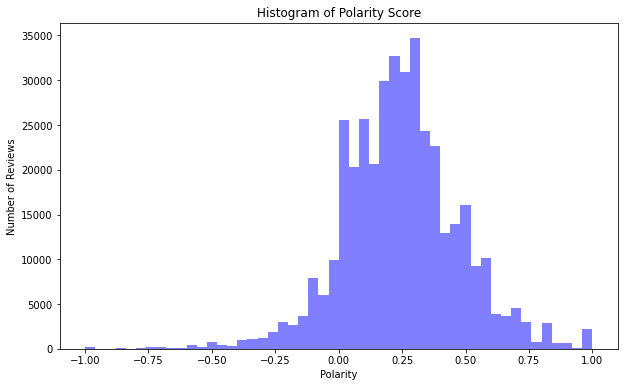

In [ ]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show()

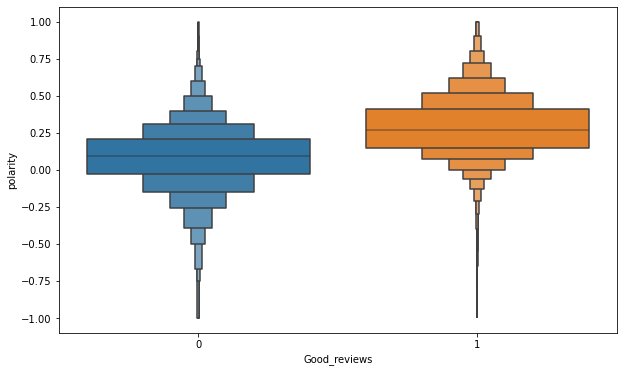

In [ ]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='Good_reviews', y='polarity', data=df)
plt.show();

As we can see from this box plot,
> we have some good reviews that has very low polarity (very negative)

> Some bad reviews that has high polarity (positive statement)


Let's check them

In [ ]:
df.loc[(df.polarity == 1 & (df.Good_reviews == 0))].Text.head(10).tolist()

['one best childrens books ever written mini version book portrayed one priced product sent email regarding bewilderment amazon got response',
 'freeze dried liver hypnotic effect dogs love anything great treat use training powdered freeze dried liver even added many dog medicines nowadays heartworm arthritis tablets etc causes dog scarf medicine like treatbr freeze dried liver dry hard yet powderyeasy chew consistency comes choppedcubed extremely lightweight due fact little moisture product thus low weights product labelsbr even though dog love liver treats shouldnt overfeed manufacturer recommends cubes daily small dogs cubes medium dogs cubes large dogsbr largest package sizes liver treats tend far economical recommend buying larger tubs save lots money youll handy treat supply around longer time dog never tire productbr really zero waste product near end tub youll find powdery bits dried liver bottom dogs go crazy sprinkle dust dog food wonderful reward easy usebr heres nutritional

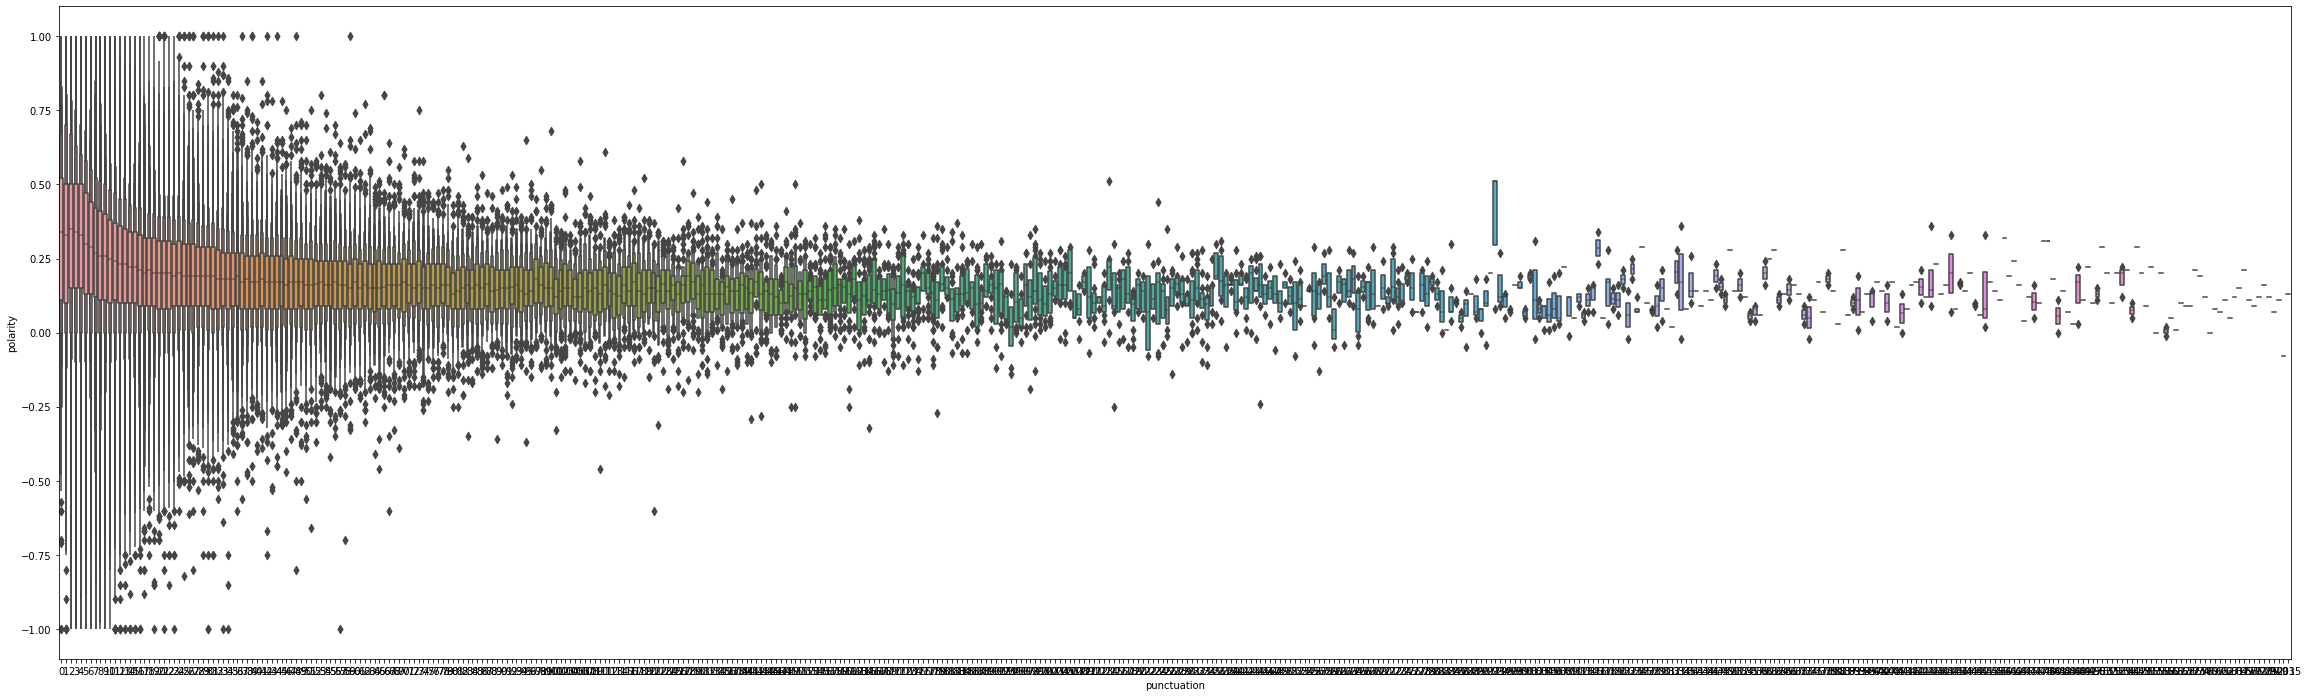

In [ ]:
plt.figure(figsize=(40,12))
sns.boxenplot(x='punctuation', y='polarity', data=df)
plt.show()

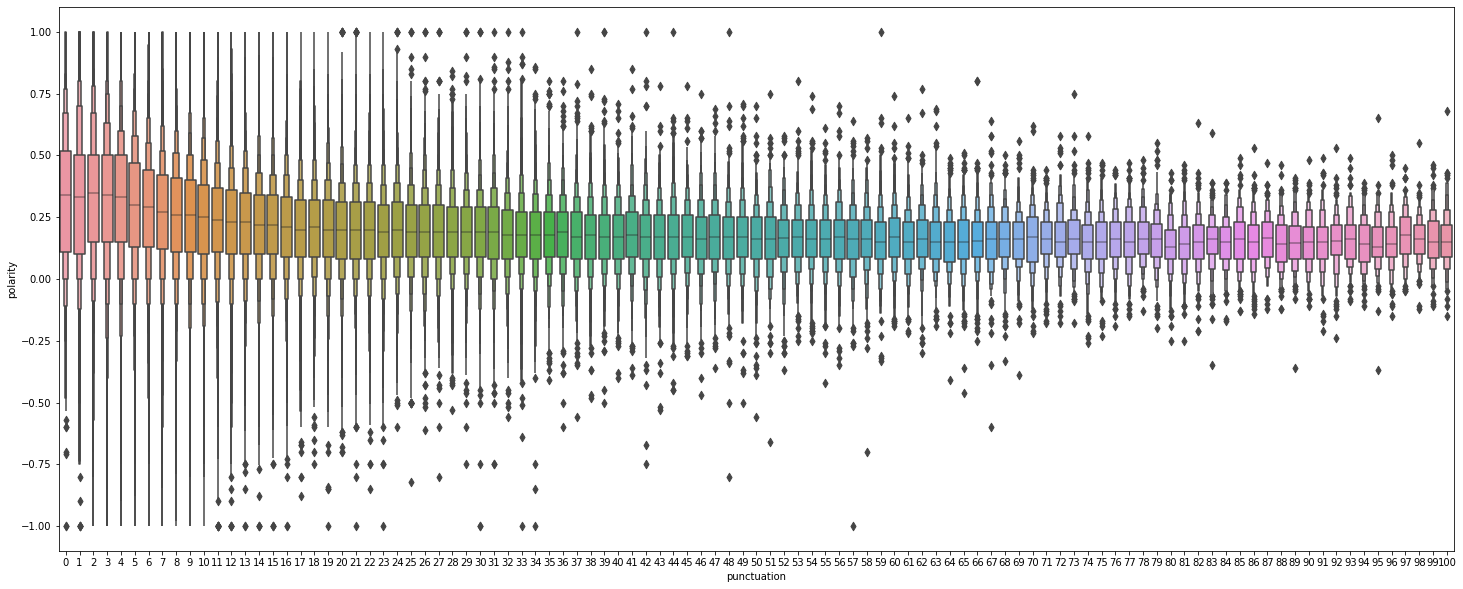

In [ ]:
plt.figure(figsize=(25,10))
df2= df.loc[df.punctuation <= 100]
sns.boxenplot(x='punctuation', y='polarity', data=df2)
plt.show()

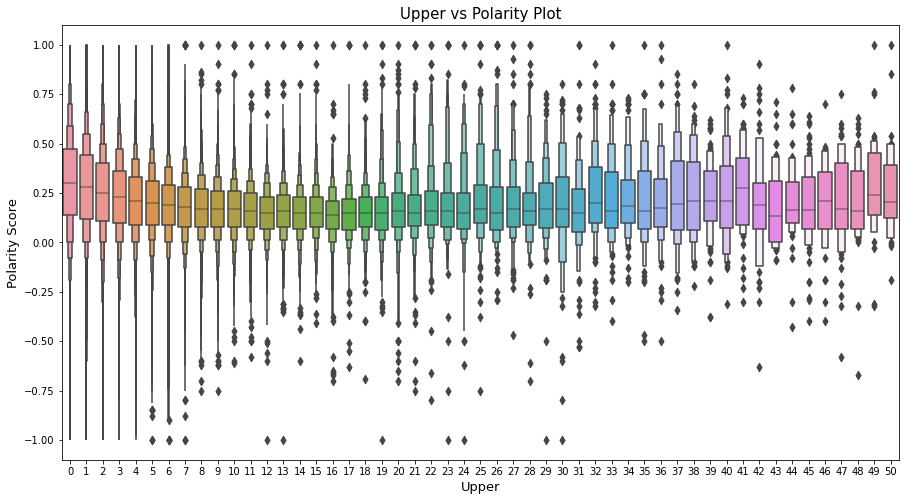

In [ ]:
# sns.set(font_scale=1) #default setting

plt.figure(figsize=(15,8))
df3= df.loc[df.upper <= 50]
sns.boxenplot(x='upper', y='polarity', data=df3)
plt.xlabel('Upper', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Upper vs Polarity Plot', fontsize=15)
plt.show()

Polarity vs Helpfullness Numerator

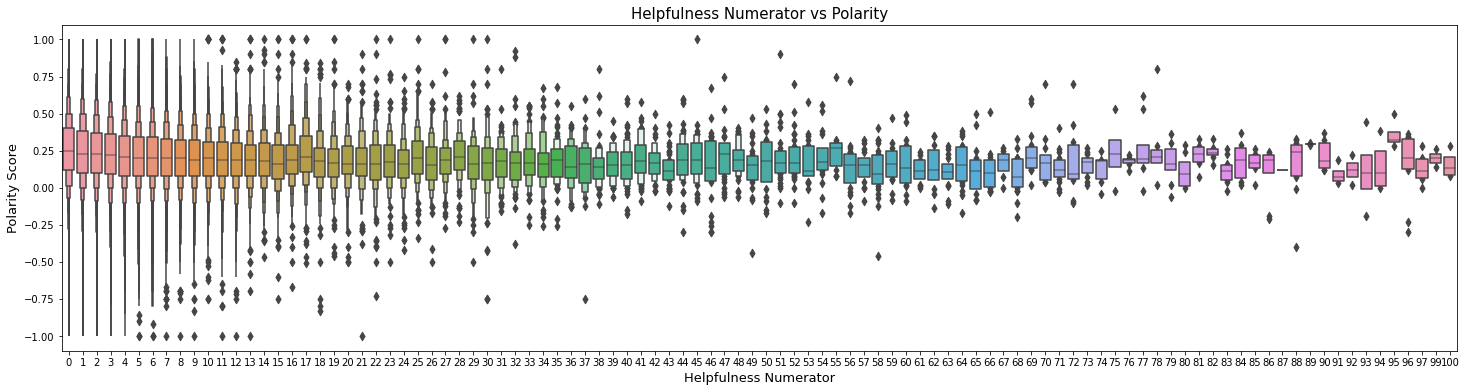

In [ ]:
plt.figure(figsize=(25,6))
df_sub= df.loc[df.HelpfulnessNumerator <=100]
sns.boxenplot(x='HelpfulnessNumerator', y='polarity', data=df_sub)
plt.xlabel('Helpfulness Numerator', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Helpfulness Numerator vs Polarity', fontsize=15)
plt.show()

We have more extreme values at low helpfullness score

#####Let's add a hue

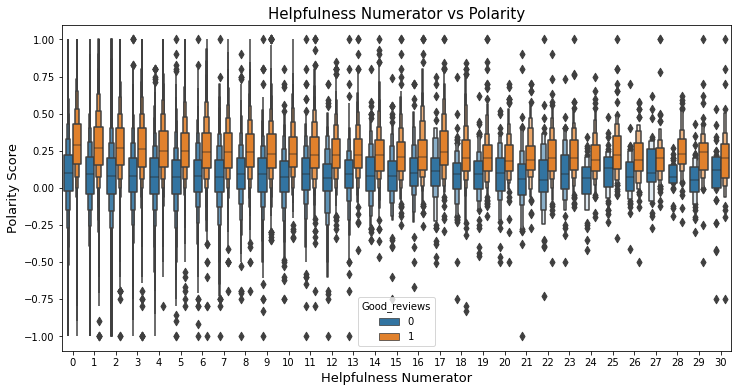

In [ ]:
plt.figure(figsize=(12,6))
df_sub= df.loc[df.HelpfulnessNumerator <=30]
sns.boxenplot(x='HelpfulnessNumerator', y='polarity', hue='Good_reviews', data=df_sub)
plt.xlabel('Helpfulness Numerator', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Helpfulness Numerator vs Polarity', fontsize=15)
plt.show();

It's interesting to see that there are reviews that are good review but highly negative at the same time.

Let's check them

In [ ]:
df.loc[((df.polarity == -1) & (df.Good_reviews == 1) & (df.HelpfulnessNumerator >= 3))].Text.head(10).tolist()

['brotherinlaw got hooked bariani olive oil terrificbr use almost every day like storebought brands almost gooey awful tastingbr recommend everyone well everyone wouldn',
 'forget highpriced energy tsps anything give energy youve ever imaginedbr shocking',
 'diabetic mints greatthey taste like ones sugar nasty aftertaste',
 'sf syrups taste awful one taste like expect bravo',
 'coffee greatthe price awful get thing bed bath beyond use one coupons']

It looks like sarcastic reviews are causing such a scoring problem for polarity. 

## **Polarity vs Number of Words** 

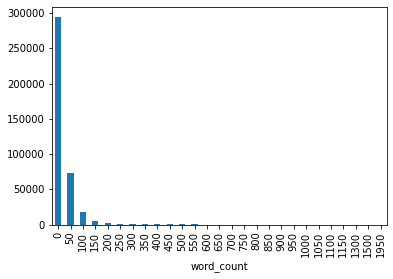

In [ ]:
df.polarity.groupby(df.word_count // 50 * 50).count().plot(kind ='bar')

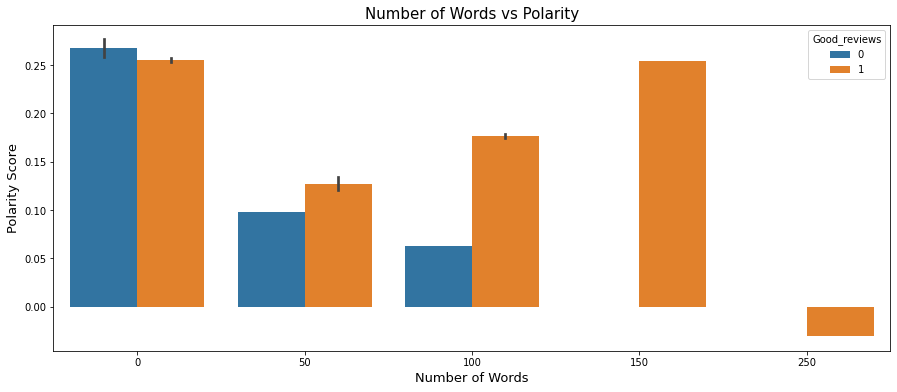

In [ ]:
df_sub= df.loc[df.word_count //10*10]
plt.figure(figsize=(15,6))
sns.barplot(x='word_count', y='polarity', hue='Good_reviews', data=df_sub)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Number of Words vs Polarity', fontsize=15)
plt.show()

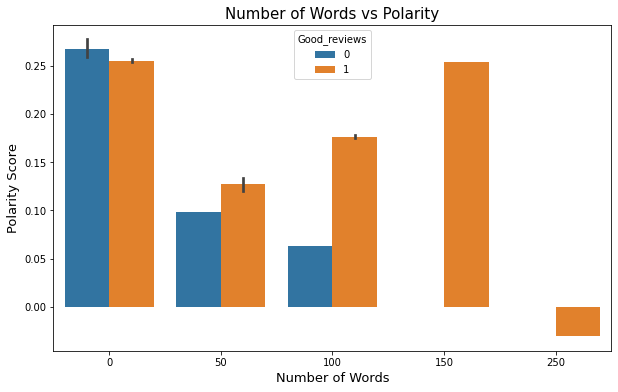

In [ ]:
df_sub2= df.loc[df.word_count //50 * 50]
plt.figure(figsize=(10,6))
sns.barplot(x='word_count', y='polarity', hue='Good_reviews', data=df_sub2)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Number of Words vs Polarity', fontsize=15)
plt.show()

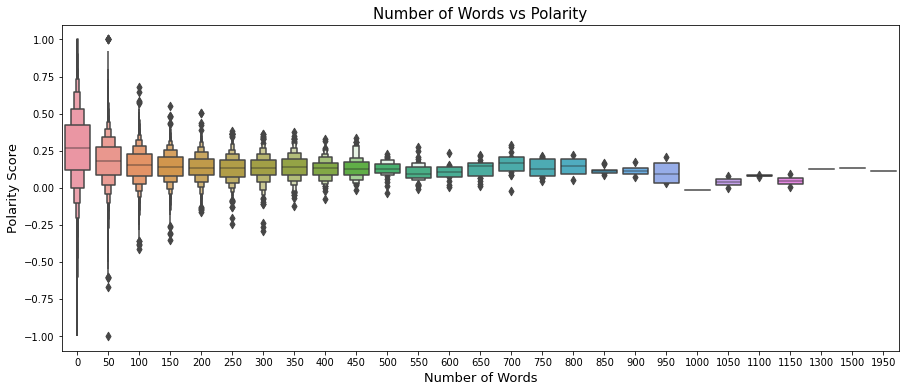

In [ ]:
plt.figure(figsize=(15,6))
sns.boxenplot(x='word_count', y='polarity', data=df)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Number of Words vs Polarity', fontsize=15)
plt.show()

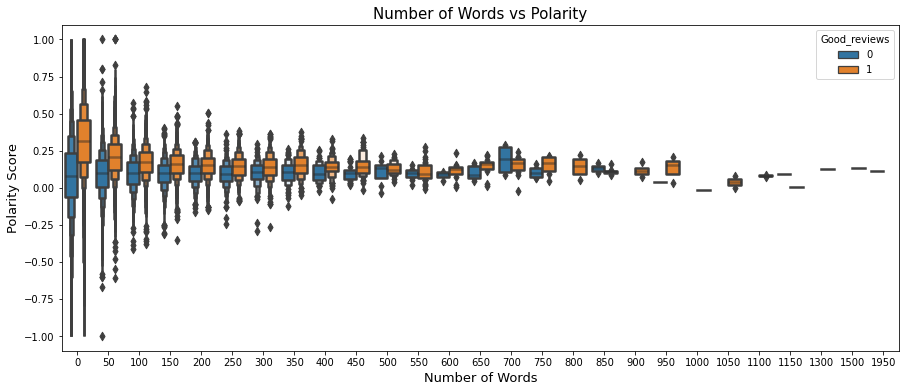

In [ ]:
plt.figure(figsize=(15,6))
sns.boxenplot(x='word_count', y='polarity', hue='Good_reviews',  linewidth=2.5, data=df)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Number of Words vs Polarity', fontsize=15)
plt.show()

It looks like, good reviwes has more number of words overall.

# **Examining Subjectivity** 

The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

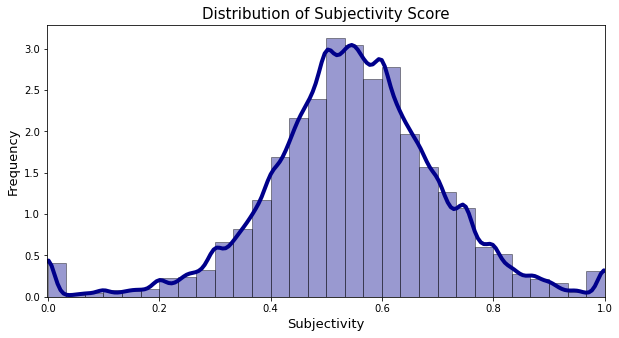

In [ ]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)

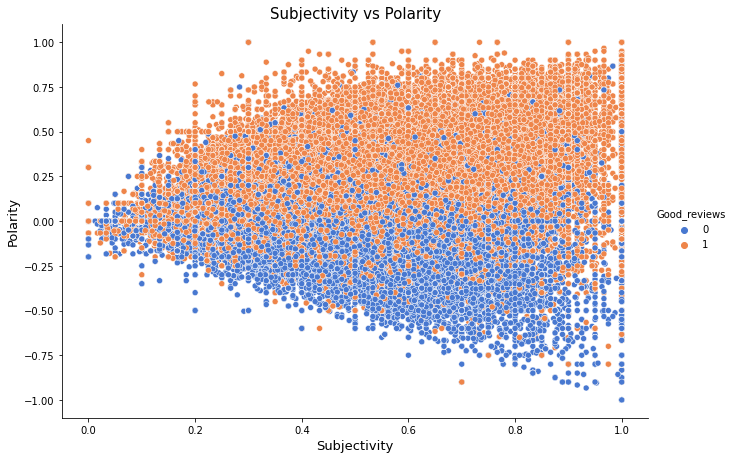

In [ ]:
#plt.figure(figsize=(10,6))
sns.relplot(x="subjectivity", y="polarity", hue="Good_reviews", alpha=1 , palette="muted",
            height=6, aspect= 1.5, data=df)
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Polarity', fontsize=13)
plt.title('Subjectivity vs Polarity', fontsize=15)
plt.show();

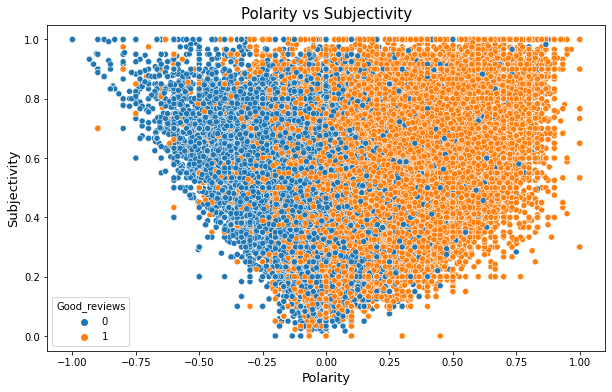

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='polarity', y='subjectivity', hue="Good_reviews", data=df)
plt.xlabel('Polarity', fontsize=13)
plt.ylabel('Subjectivity', fontsize=13)
plt.title('Polarity vs Subjectivity', fontsize=15)
plt.show();

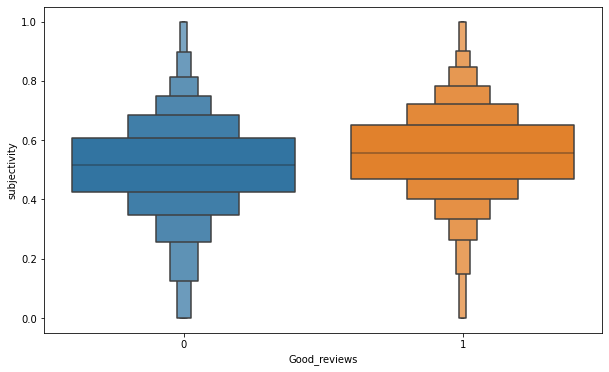

In [ ]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='Good_reviews', y='subjectivity', data=df)
plt.show()

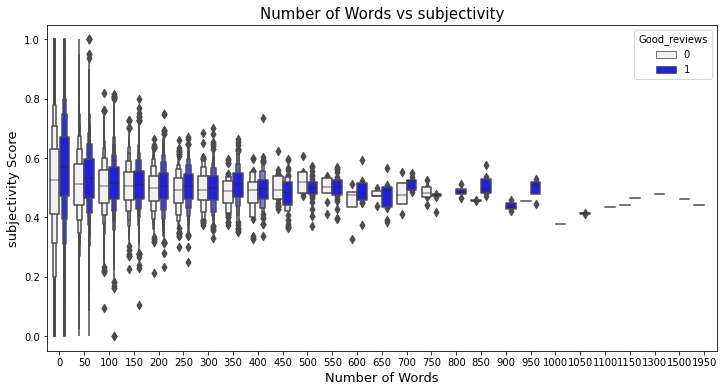

In [ ]:
plt.figure(figsize=(12,6))
df_sub= df.loc[df.HelpfulnessNumerator <=30]
sns.boxenplot(x='word_count', y='subjectivity', hue='Good_reviews', data=df_sub, color= 'blue')
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('subjectivity Score', fontsize=13)
plt.title('Number of Words vs subjectivity', fontsize=15)
plt.show()

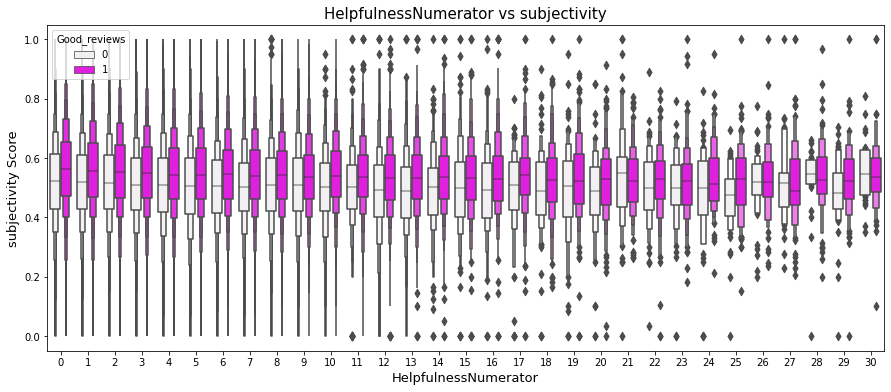

In [ ]:
plt.figure(figsize=(15,6))
df_sub= df.loc[df.HelpfulnessNumerator <=30]
sns.boxenplot(x='HelpfulnessNumerator', y='subjectivity', hue='Good_reviews', data=df_sub, color= 'magenta')
plt.xlabel('HelpfulnessNumerator', fontsize=13)
plt.ylabel('subjectivity Score', fontsize=13)
plt.title('HelpfulnessNumerator vs subjectivity', fontsize=15)
plt.show()

In [ ]:
# Top 10 reviews that have highest polarity (most positive sentiment) but 'good review' value is 0, and most subjective (opinion):
df.loc[(df["Good_reviews"] == 0) & (df.polarity == 1 ) & (df.subjectivity ==1), "Text"].head(10).tolist()

['dont order product think youre getting two bottles one bottle arrived wonderful time trying get refund fool shame',
 'cheese awesome however warn people goat sheep milk cheese incldued',
 'chocolate delicious seller sent melt chocolate melt guess expires didnt find expiration date box',
 'havent quite determined yogi detox cause since drinking three days lots dizziness going drink week see relationship symptom lots ingredients tastes wonderful may interacting medication',
 'thought found perfect treat orallyfixated lab recieved saw made china dont trust give dog',
 'tea tastes like spiced tea rather coconut try cs vanilla maple crave excellent tea',
 'product superb however toss away two cans received tops popped three cans severely dented suspec',
 'like itbut impressive waywill stick grain bread use compan',
 'product wonderful package put box three packages crumbs opened would buy packages packed properl',
 'hanover organic oat bran pretzel sticks packages pack one word needed des

Sarcasm is a reason for high polarity score

In [ ]:
# Top 10 reviews that have lowest polarity (most negative sentiment) but 'good review' value is 1, and most subjective (opinion):
df.loc[(df["Good_reviews"] == 1) & (df.polarity == -1 ) & (df.subjectivity ==1), "Text"].head(10).tolist()

['brotherinlaw got hooked bariani olive oil terrificbr use almost every day like storebought brands almost gooey awful tastingbr recommend everyone well everyone wouldn',
 'forget highpriced energy tsps anything give energy youve ever imaginedbr shocking',
 'diabetic mints greatthey taste like ones sugar nasty aftertaste',
 'son loves like cheese pufftype thing leave crumbs everywhere brother banned daughter resulting poop quite terrible',
 'cat review discovered product migraines thirty years pain mausea terrible cola helped nausea never treated migraine anything sn orphan disease',
 'makes bit pilling session obsolete dont get fingers slimy giving fido nasty medicine either',
 'use give dogs nasty tasting pills works like charm',
 'sf syrups taste awful one taste like expect bravo',
 'place order july pack ea vita coco coconut water horrible company goshoptnt still dont know cancel order',
 'terrible awful dont buy means availability coffee need say please please dont bu']

As we can see, some of these tweets are about dealing with bad things with the items. But, their polarity scores are -1 because of the job of the item.


In [ ]:
df.to_csv('/content/drive/MyDrive/Amazon_reviews_after_sentiment.csv',index=False)